<a href="https://colab.research.google.com/github/tugrulguner/codeML_chl1/blob/main/CodeML_Hackathon_Challenge1_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superconductor critical temperature prevision

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# copy the kaggle.json to folder
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle --upgrade

In [ ]:
! kaggle competitions download -c code-ml-2021-challenge-1

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls /content

'kaggle (1).json'   kaggle.json   sample_data	 train.csv.zip
'kaggle (2).json'   sample.csv	  test.csv.zip


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
df_train = pd.read_csv('/content/train.csv.zip')
df_train.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,96.227767,69.981422,57.954438,40.098709,0.794201,0.817715,164.155800,40.930889,67.182467,57.118264,677.566667,732.422222,665.961164,726.484049,1.082088,0.911325,287.2,298.644444,120.940105,86.403032,159.00,139.666667,148.368497,130.708055,1.036508,0.987400,130,52.777778,53.987653,48.898989,8250.333333,7720.111111,6704.729022,5899.681451,0.941813,0.792342,9990.0000,4440.000000,4230.657186,4768.655073,...,67.677778,54.456999,55.479925,0.950753,0.750737,83.0,43.700000,34.953906,39.542432,31.233333,34.311111,28.792816,31.494735,1.014146,0.826258,28.300,19.777778,13.270602,14.032854,64.333333,80.444444,40.165977,54.588914,0.677487,0.523756,134.00000,64.888889,60.741712,62.298762,4.00,4.333333,3.779763,4.082370,1.039721,0.858741,3,2.333333,1.414214,1.490712,8.61
1,62.734867,71.459401,37.781947,42.135100,0.898852,0.760256,164.483300,52.455142,67.263768,71.377194,931.800000,1027.551220,841.468958,945.160244,1.290977,1.165819,905.9,384.979268,400.763552,380.700162,133.25,120.792683,114.989454,102.987229,1.254603,1.205963,152,47.195122,66.555898,67.378932,3570.616250,4141.922256,84.837751,49.716659,0.250845,0.101000,13308.7490,4057.545427,5636.841631,6077.456672,...,114.543902,22.194712,18.237192,0.508492,0.302342,349.0,106.402439,143.925745,156.870815,7.915000,9.081707,2.956252,3.040768,0.662100,0.516790,25.140,7.664634,10.207726,10.931975,40.758682,18.974003,0.927561,0.308370,0.409012,0.663524,139.99110,11.948506,58.060141,38.398420,3.25,3.743902,2.783158,3.484330,1.265857,1.161736,4,1.439024,1.479020,1.145628,22.80
2,131.173284,98.276642,113.479841,86.135428,0.561468,0.693145,131.586569,0.206642,65.793284,56.978656,897.550000,901.675000,897.512083,901.646519,0.693105,0.558534,16.5,457.025000,8.250000,7.144710,158.00,150.000000,157.187786,149.401023,0.688011,0.602152,32,63.000000,16.000000,13.856406,13220.000000,10180.000000,11738.909660,9155.097759,0.583304,0.691791,12160.0000,530.000000,6080.000000,5265.434455,...,57.200000,18.342573,5.245366,0.039930,0.096744,222.8,54.950000,111.400000,96.475230,9.925000,8.637500,9.585145,8.393498,0.659103,0.654444,5.150,2.387500,2.575000,2.230015,220.000000,170.000000,195.959179,153.346345,0.585953,0.691416,200.00000,10.000000,100.000000,86.602540,3.50,2.750000,3.162278,2.514867,0.598270,0.689009,3,0.250000,1.500000,1.299038,1.21
3,50.458275,37.642417,32.677538,23.407534,0.364960,0.517533,76.895150,21.628150,38.447575,36.248721,850.550000,928.933333,817.398177,898.

In [ ]:
df_test = pd.read_csv('/content/test.csv.zip')
df_test.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,index
0,86.611119,56.467425,66.432363,36.480694,1.406936,1.370440,141.2506,20.673898,52.623254,51.771103,782.580000,1002.093077,739.690186,935.159708,1.549993,0.912470,810.6,701.222308,281.920140,344.213096,166.200000,116.207692,144.206838,90.371945,1.498667,1.391249,205,37.753846,72.964101,81.412029,5854.485800,3215.769462,1258.762756,69.307636,1.332668,0.994009,8958.571,1997.999769,3545.771655,3856.746370,...,110.317692,61.591882,89.542323,1.419935,0.822737,127.05,76.229231,46.239187,47.376581,9.504400,5.166462,5.190938,1.325677,1.375067,1.124597,15.978,2.802769,5.411676,5.583339,105.805316,93.629697,11.605291,1.048947,0.722338,0.233318,399.97342,89.216457,151.308411,164.504908,2.600000,2.092308,2.491462,2.074393,1.564957,1.258479,2,1.046154,0.800000,0.314915,0
1,92.348480,84.119200,71.916468,69.418308,1.432319,1.438685,141.2506,24.948371,50.825974,44.883208,740.760000,741.971429,693.456186,707.807862,1.537759,1.422035,810.6,247.500000,297.526675,251.463231,179.600000,169.714286,155.133632,152.168124,1.502074,1.458108,205,55.285714,75.242541,65.484380,4600.485800,5846.061286,986.409016,1852.861794,1.269731,0.981032,8958.571,3839.795857,3350.285214,3449.069753,...,82.240000,38.873764,53.631177,1.237240,1.003310,135.97,50.452857,54.868531,52.131633,7.864400,9.360286,4.507761,6.114138,1.391534,1.126284,12.878,5.582571,4.252419,4.302402,92.805316,180.575226,9.407401,27.465099,0.538258,0.250718,399.97342,171.424774,154.016796,190.269777,2.200000,2.142857,2.168944,2.119268,1.594167,1.494365,1,0.571429,0.400000,0.349927,1
2,82.024542,48.401308,68.846824,32.906067,1.668511,1.630002,124.1166,13.560166,37.301144,42.520974,741.233333,1024.047211,704.482658,957.458614,1.735517,0.931543,773.0,751.205263,265.666675,344.076813,166.500000,104.946316,149.929039,83.865464,1.715616,1.645848,171,25.289474,58.059596,69.636540,5505.404833,2650.415211,1476.359134,46.717340,1.513197,1.306391,10278.571,1296.014789,3553.437602,3533.971769,...,108.575737,48.562587,82.609120,1.538031,0.788713,135.97,81.812632,47.675413,49.544445,12.370333,4.516211,6.119473,1.077000,1.395139,1.546157,35.778,1.767526,11.355750,6.183193,100.337763,65.472757,14.596763,0.675346,0.949778,0.502448,399.97342,57.879348,141.745076,138.860517,3.166667,2.316316,2.884499,2.230124,1.694415,1.432127,4,1.078947,1.462494,0.765332,2
3,74.621093,60.185761,53.469421,37.938762,1.648219,1.503164,191.2006,25.223132,60.705921,61.490909,886.728571,1002.352020,812.651618,942.98

# Data Exploration

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 81 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   mean_atomic_mass                 15000 non-null  float64
 1   wtd_mean_atomic_mass             15000 non-null  float64
 2   gmean_atomic_mass                15000 non-null  float64
 3   wtd_gmean_atomic_mass            14872 non-null  float64
 4   entropy_atomic_mass              15000 non-null  float64
 5   wtd_entropy_atomic_mass          15000 non-null  float64
 6   range_atomic_mass                15000 non-null  float64
 7   wtd_range_atomic_mass            15000 non-null  float64
 8   std_atomic_mass                  15000 non-null  float64
 9   wtd_std_atomic_mass              15000 non-null  float64
 10  mean_fie                         15000 non-null  float64
 11  wtd_mean_fie                     15000 non-null  float64
 12  gmean_fie         

In [ ]:
df_train.describe()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,...,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,15000.000000,15000.000000,15000.000000,14872.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14883.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14883.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14873.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,14874.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14874.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,594.093448,377.574159,384.641848,423.131663,470.583297,166.539736,337.727855,256.470970,584.854714,457.410707,929.051125,1166.922149,1062.324767,1157.234258,276.457275,315.200094,1055.704227,844.483616,429.683228,792.645461,205.324915,277.575617,583.119670,281.988090,80.792590,323.741908,333.227467,477.709668,447.085794,263.308326,6308.444470,5658.619785,3686.233067,3505.886135,271.856805,417.437052,8956.932604,3055.242473,3759.724580,3847.684390,...,336.940427,335.006396,261.386388,195.503743,139.196174,455.232519,420.651004,402.520135,316.583848,330.416379,300.187496,180.222321,104.271637,215.799962,335.272717,316.419073,417.691221,398.137711,383.481394,307.696450,153.875098,331.011217,561.598181,299.868324,181.506633,473.547837,411.589413,487.080134,512.053380,199.986135,244.952826,470.961544,413.442523,207.646926,328.013981,447.19880,167.232654,254.460598,220.968494,34.357437
std,19299.489971,13851.592650,16089.013123,16317.606173,17784.955601,9725.158443,11983.514390,12795.603122,18486.745011,17905.424714,9293.173145,14980.280290,14336.402282,15011.827978,13282.787505,14807.345061,18693.112376,14651.012934,11029.787336,21333.373948,4148.043467,8540.036173,16410.858166,10119.629598,6879.613673,13707.212208,9407.644758,16403.079872,15534.828812,12816.573437,9144.493775,17016.532440,12612.020299,15445.044343,14138.347112,15969.985560,12909.476240,8259.000487,15

## Missing Values in the Training Set

# New Section

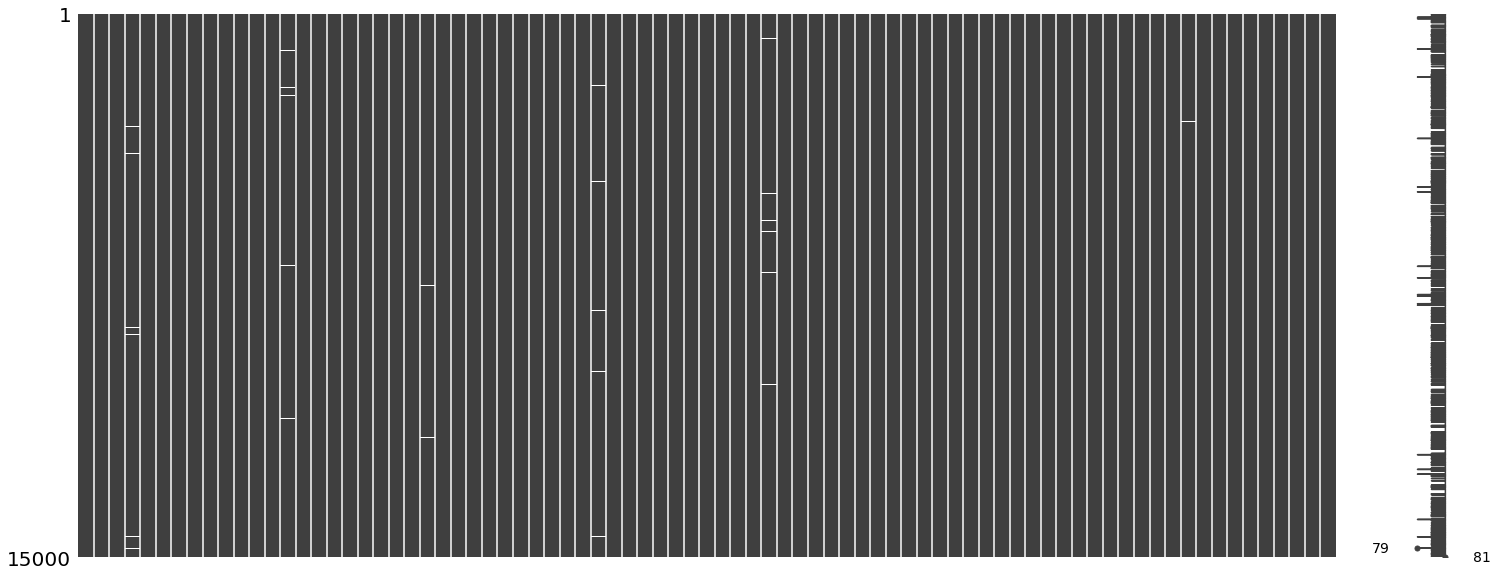

In [ ]:
import missingno as msno

# get the first impression of missing values in the training set
msno.matrix(df_train);

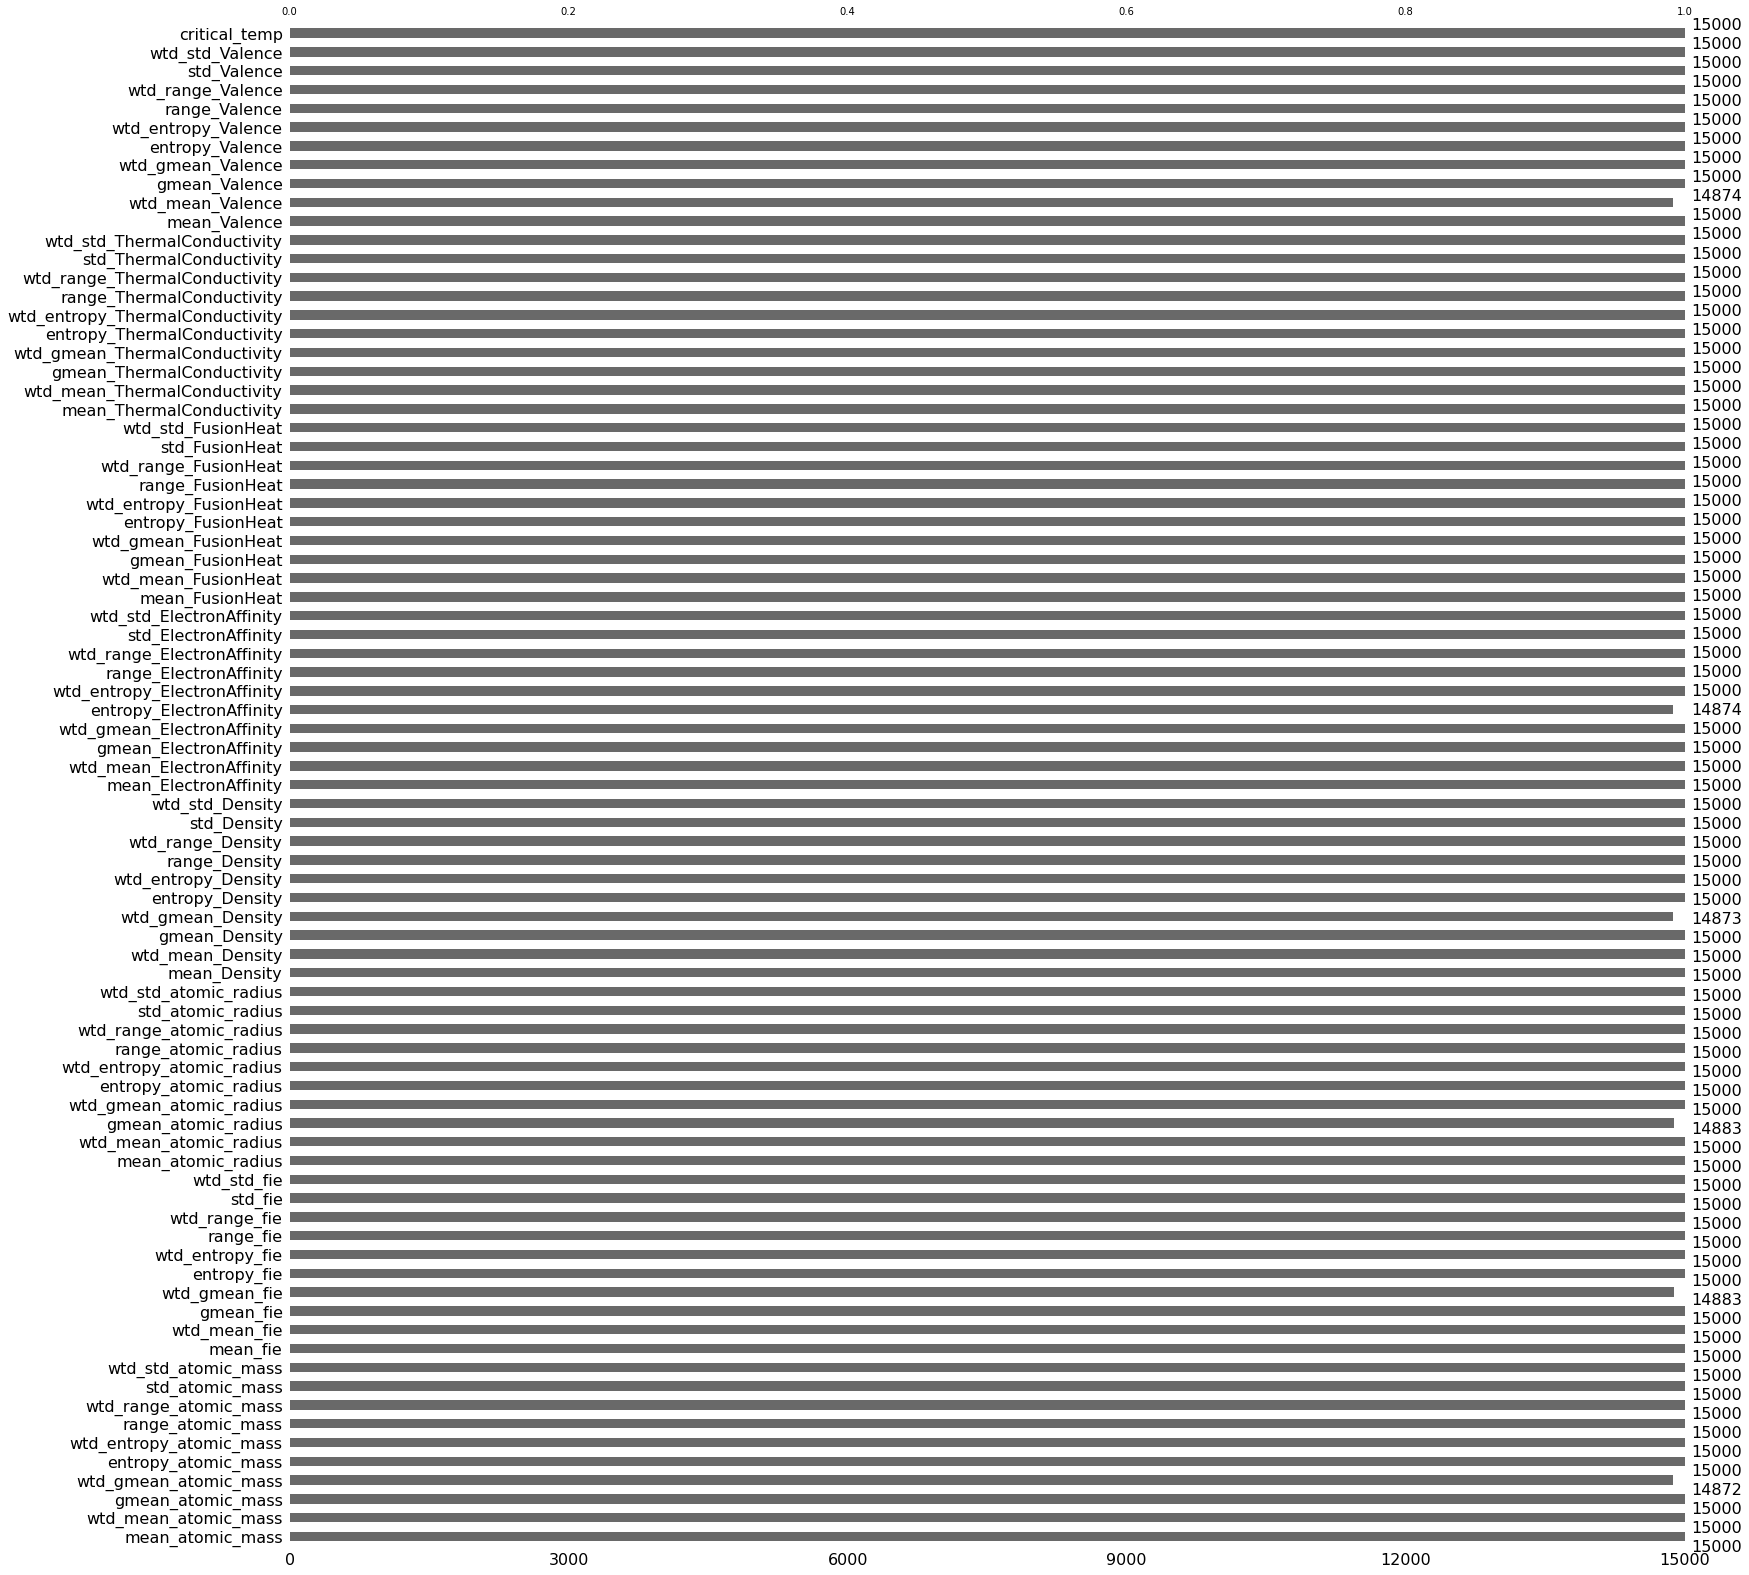

In [ ]:
# Numbers of null values in the training set
msno.bar(df_train);

In [ ]:
# Let's calculate the percentage of null values in the training set
for i in df_train.columns:
    null_rate = df_train[i].isna().sum() / len(df_train) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

wtd_gmean_atomic_mass's null rate :0.85%
wtd_gmean_fie's null rate :0.78%
gmean_atomic_radius's null rate :0.78%
wtd_gmean_Density's null rate :0.85%
entropy_ElectronAffinity's null rate :0.84%
wtd_mean_Valence's null rate :0.84%


### Taking care of missing data (Training Set)

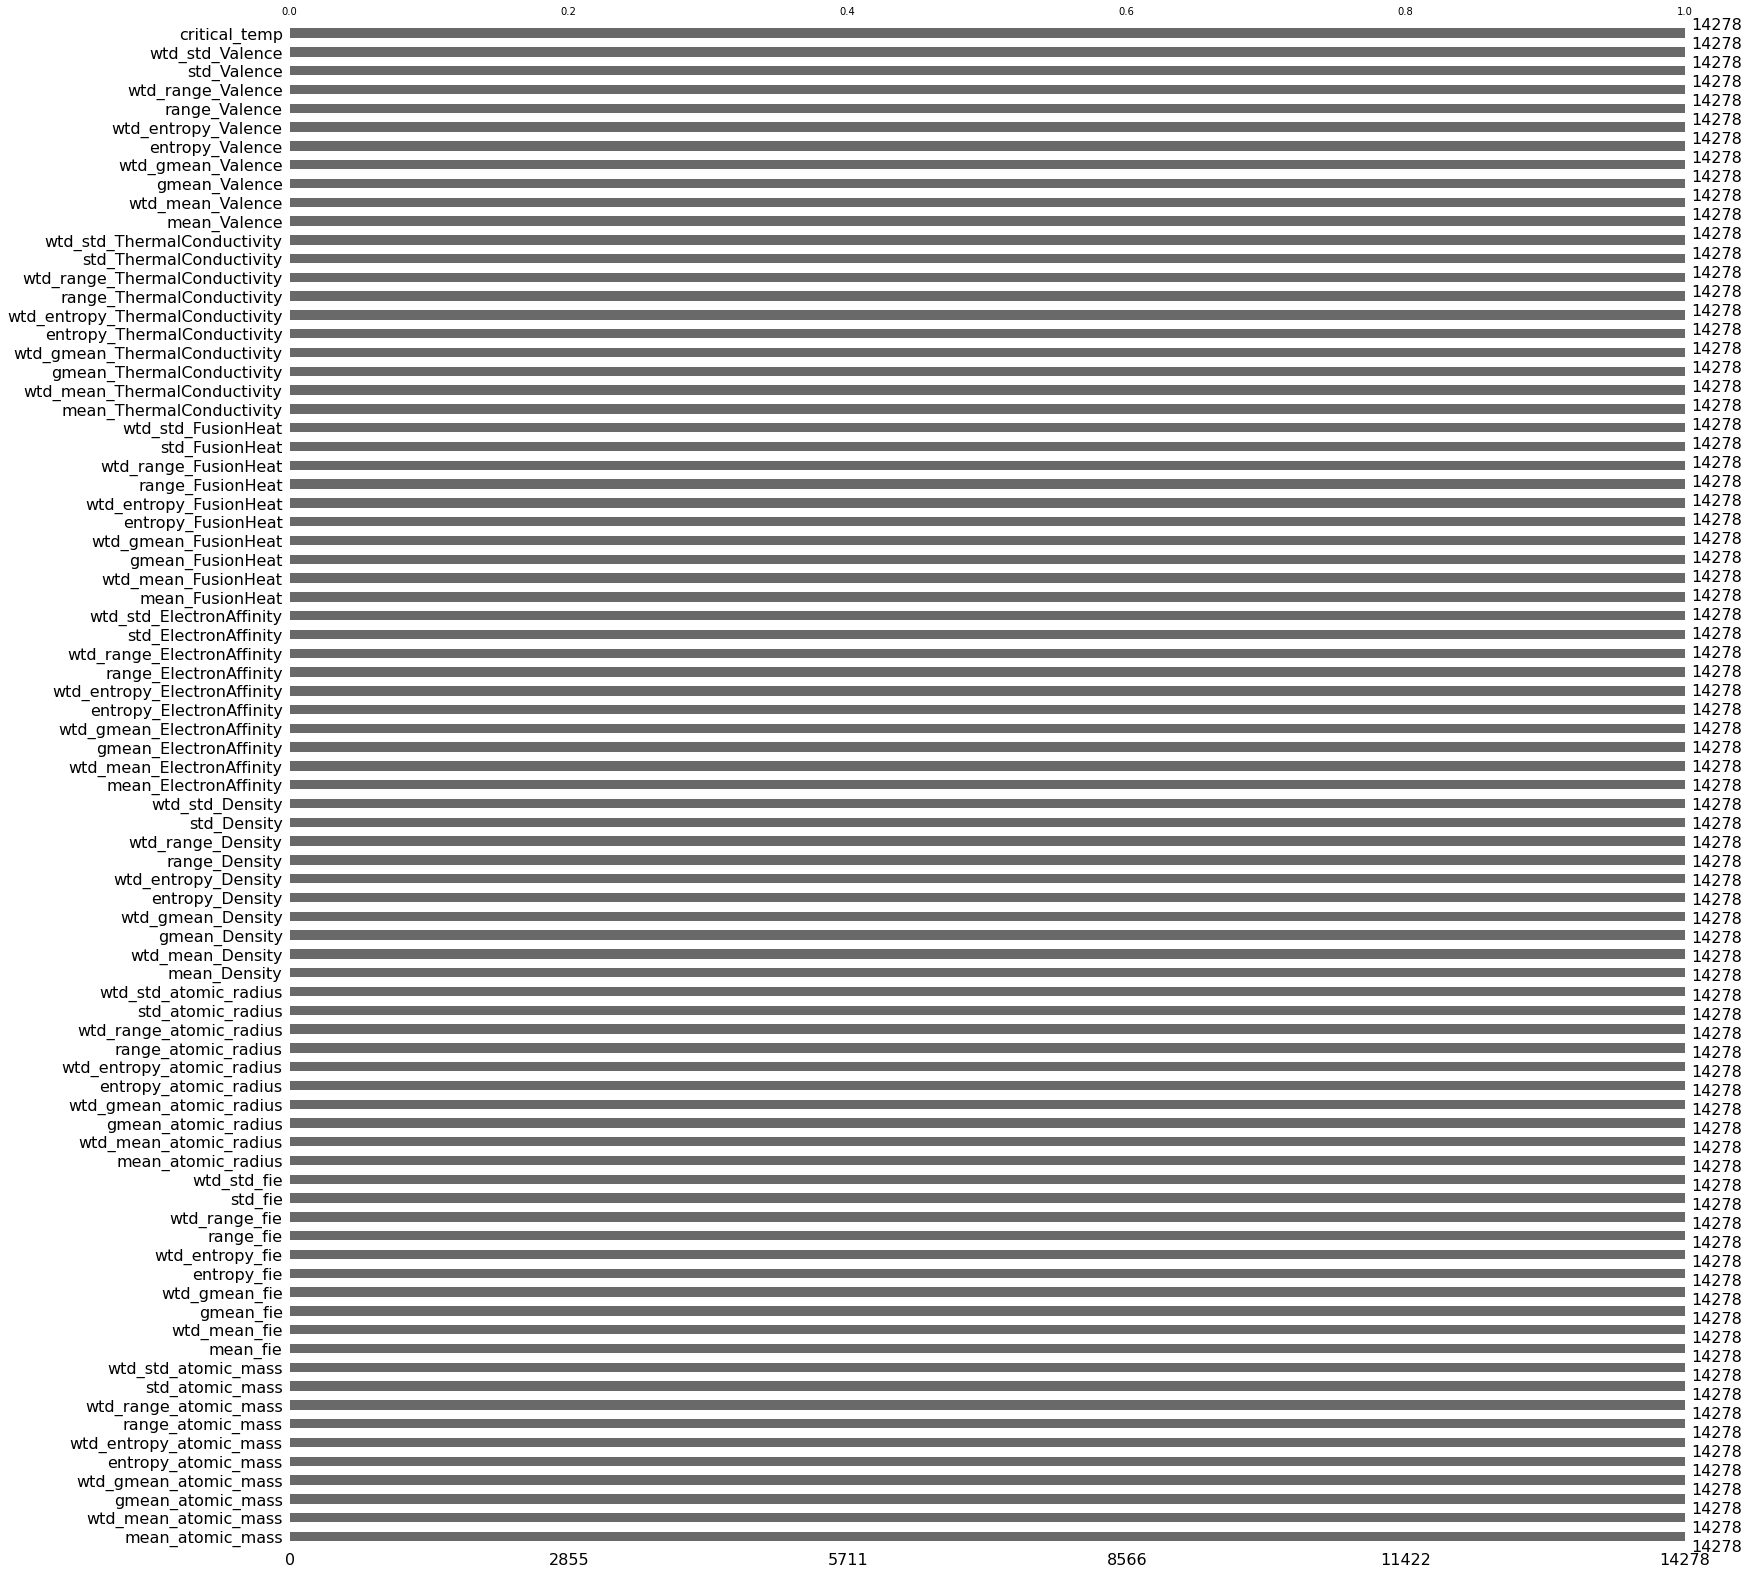

In [ ]:
# As null values are a small portion of the data, let's drop those rows
df_train.dropna(how="any", inplace = True)
msno.bar(df_train); # Last check for null values!

Great! No more null values in the training set! Each feature can be represented as an array of (1,14278)

In [ ]:
# Last check: Let's calculate the percentage of null values in the training set
for i in df_train.columns:
    null_rate = df_train[i].isna().sum() / len(df_train) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))
    elif null_rate == 0 :
        print("{}'s null rate :{}%".format(i, 0))

mean_atomic_mass's null rate :0%
wtd_mean_atomic_mass's null rate :0%
gmean_atomic_mass's null rate :0%
wtd_gmean_atomic_mass's null rate :0%
entropy_atomic_mass's null rate :0%
wtd_entropy_atomic_mass's null rate :0%
range_atomic_mass's null rate :0%
wtd_range_atomic_mass's null rate :0%
std_atomic_mass's null rate :0%
wtd_std_atomic_mass's null rate :0%
mean_fie's null rate :0%
wtd_mean_fie's null rate :0%
gmean_fie's null rate :0%
wtd_gmean_fie's null rate :0%
entropy_fie's null rate :0%
wtd_entropy_fie's null rate :0%
range_fie's null rate :0%
wtd_range_fie's null rate :0%
std_fie's null rate :0%
wtd_std_fie's null rate :0%
mean_atomic_radius's null rate :0%
wtd_mean_atomic_radius's null rate :0%
gmean_atomic_radius's null rate :0%
wtd_gmean_atomic_radius's null rate :0%
entropy_atomic_radius's null rate :0%
wtd_entropy_atomic_radius's null rate :0%
range_atomic_radius's null rate :0%
wtd_range_atomic_radius's null rate :0%
std_atomic_radius's null rate :0%
wtd_std_atomic_radius's 

Great! Another confirmation that there is no more null values in the training set!

## Missing Values in the Test Set

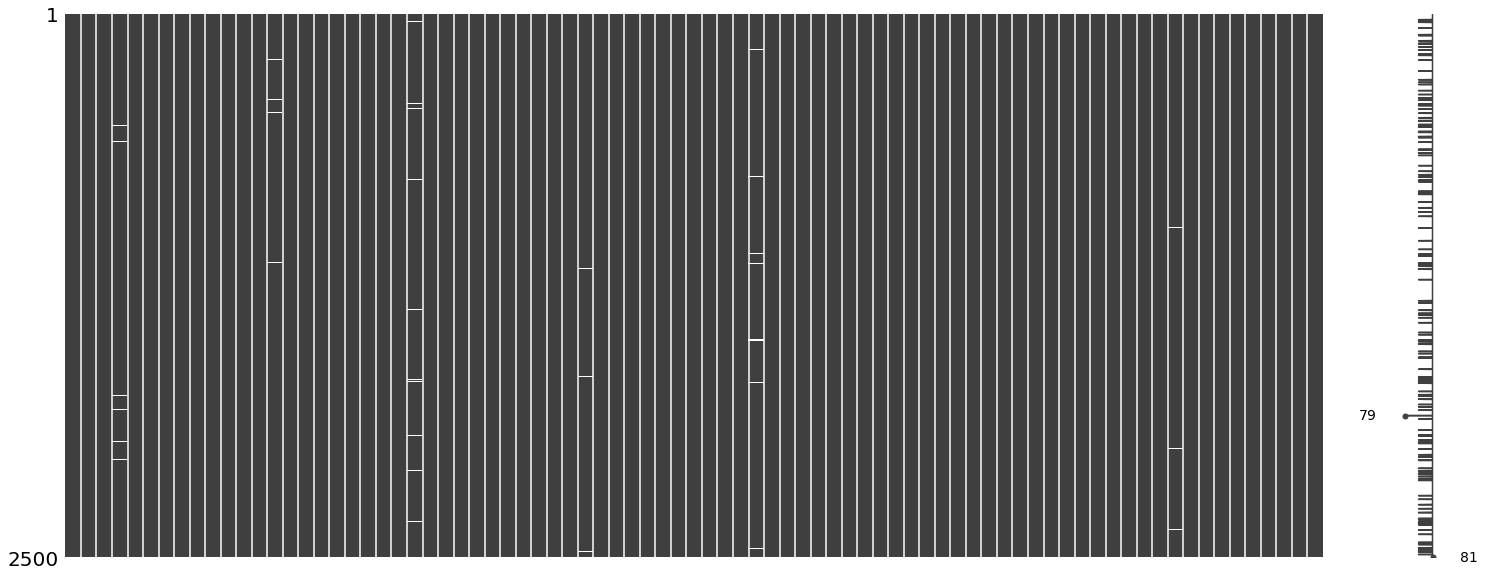

In [ ]:
# get the first impression of missing values in the test set
msno.matrix(df_test);

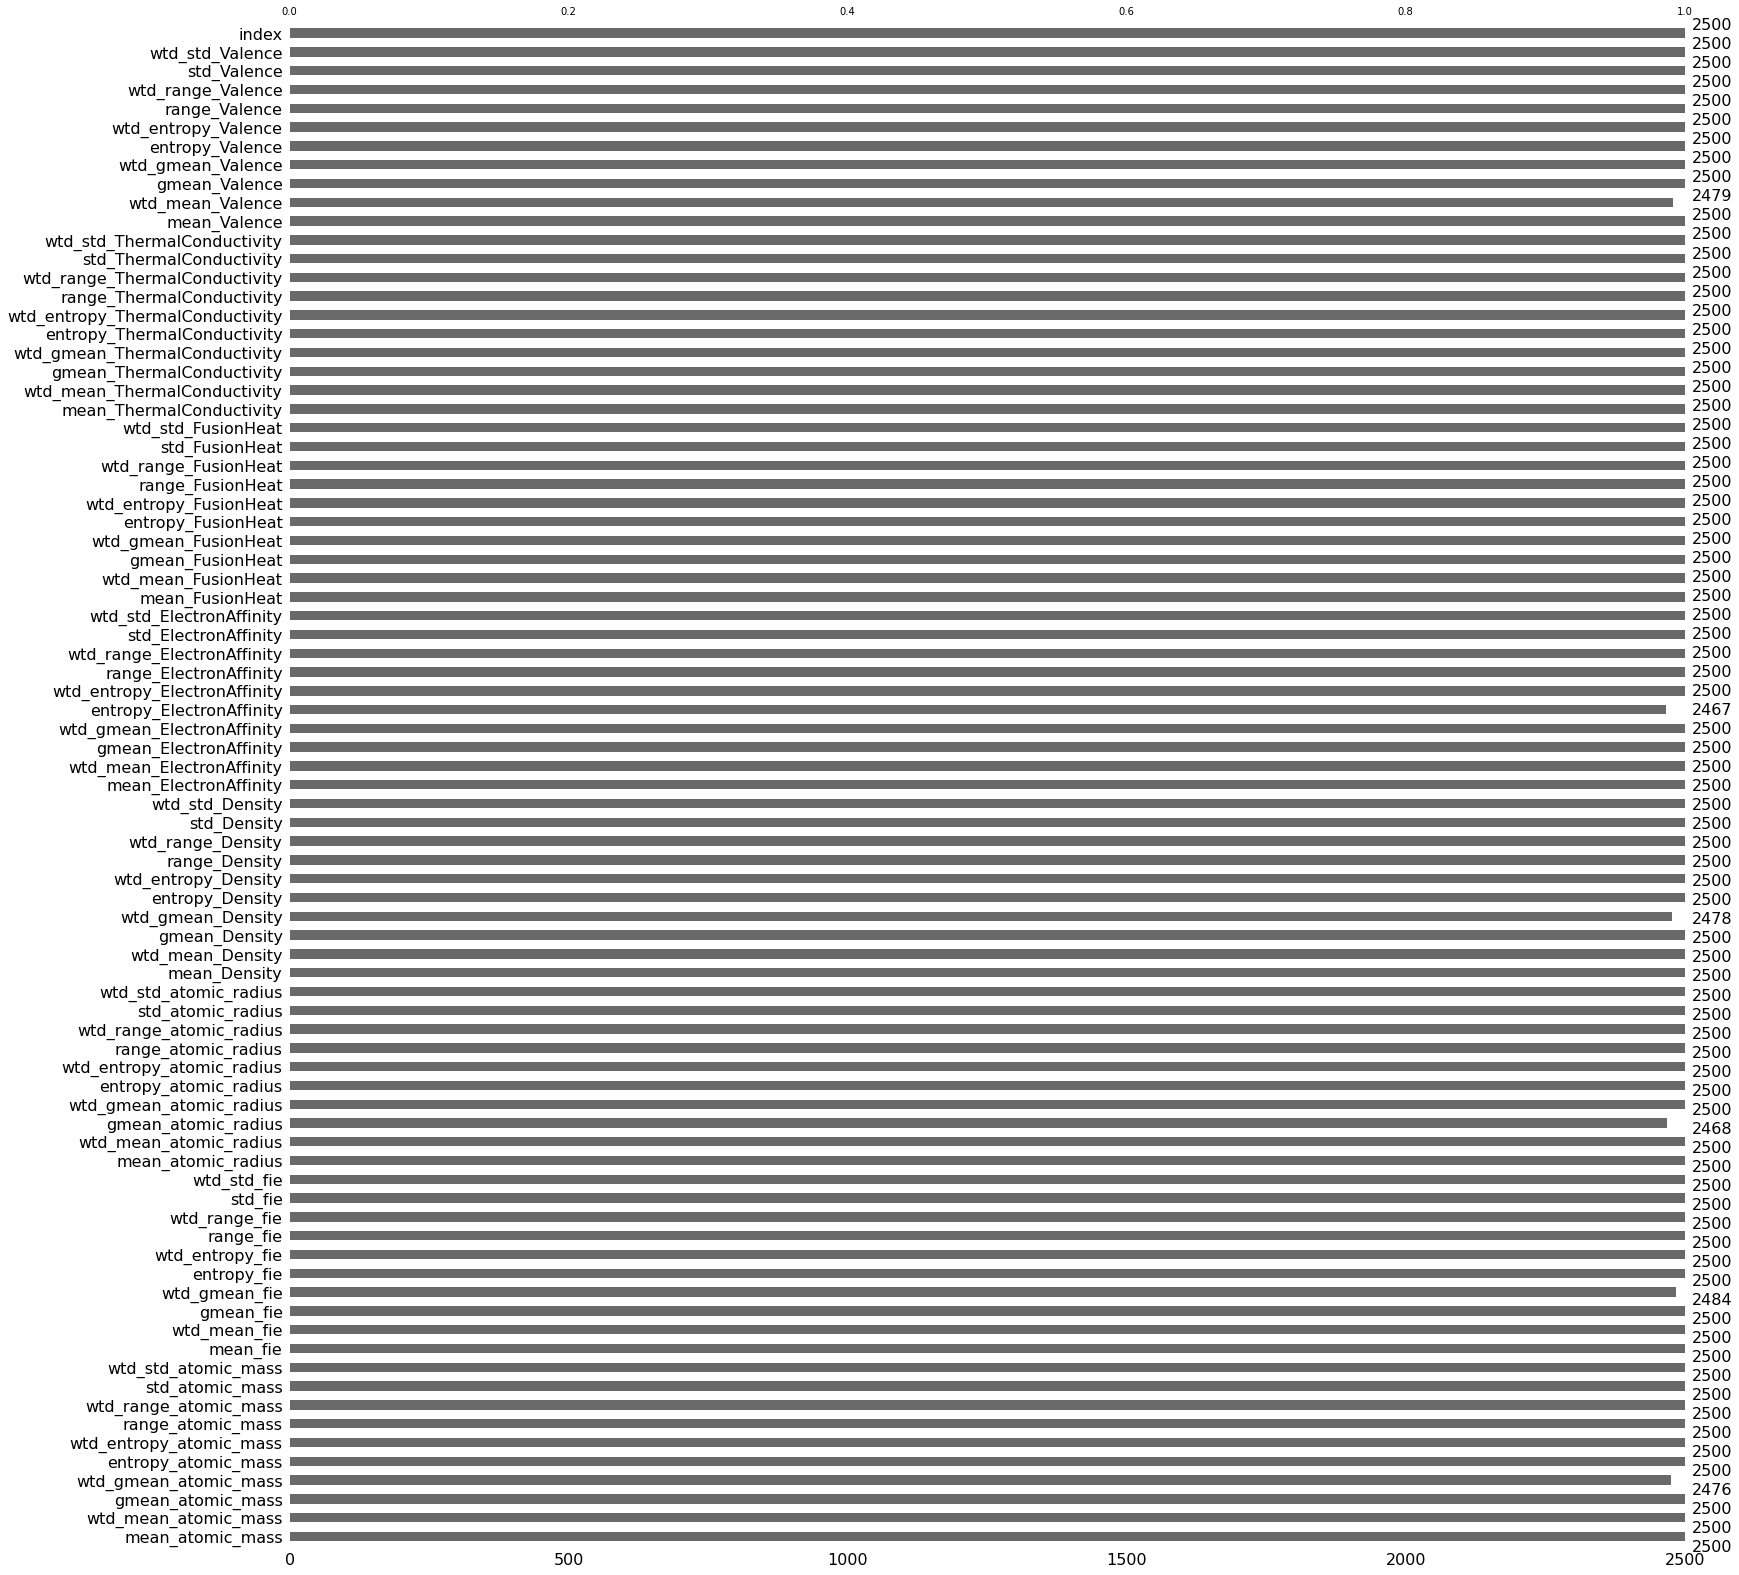

In [ ]:
# Numbers of null values in the test set
msno.bar(df_test);

In [ ]:
# Let's calculate the percentage of null values in the test set
for i in df_test.columns:
    null_rate = df_test[i].isna().sum() / len(df_test) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

wtd_gmean_atomic_mass's null rate :0.96%
wtd_gmean_fie's null rate :0.64%
gmean_atomic_radius's null rate :1.28%
wtd_gmean_Density's null rate :0.88%
entropy_ElectronAffinity's null rate :1.32%
wtd_mean_Valence's null rate :0.84%


### Taking care of missing data (Test Set)

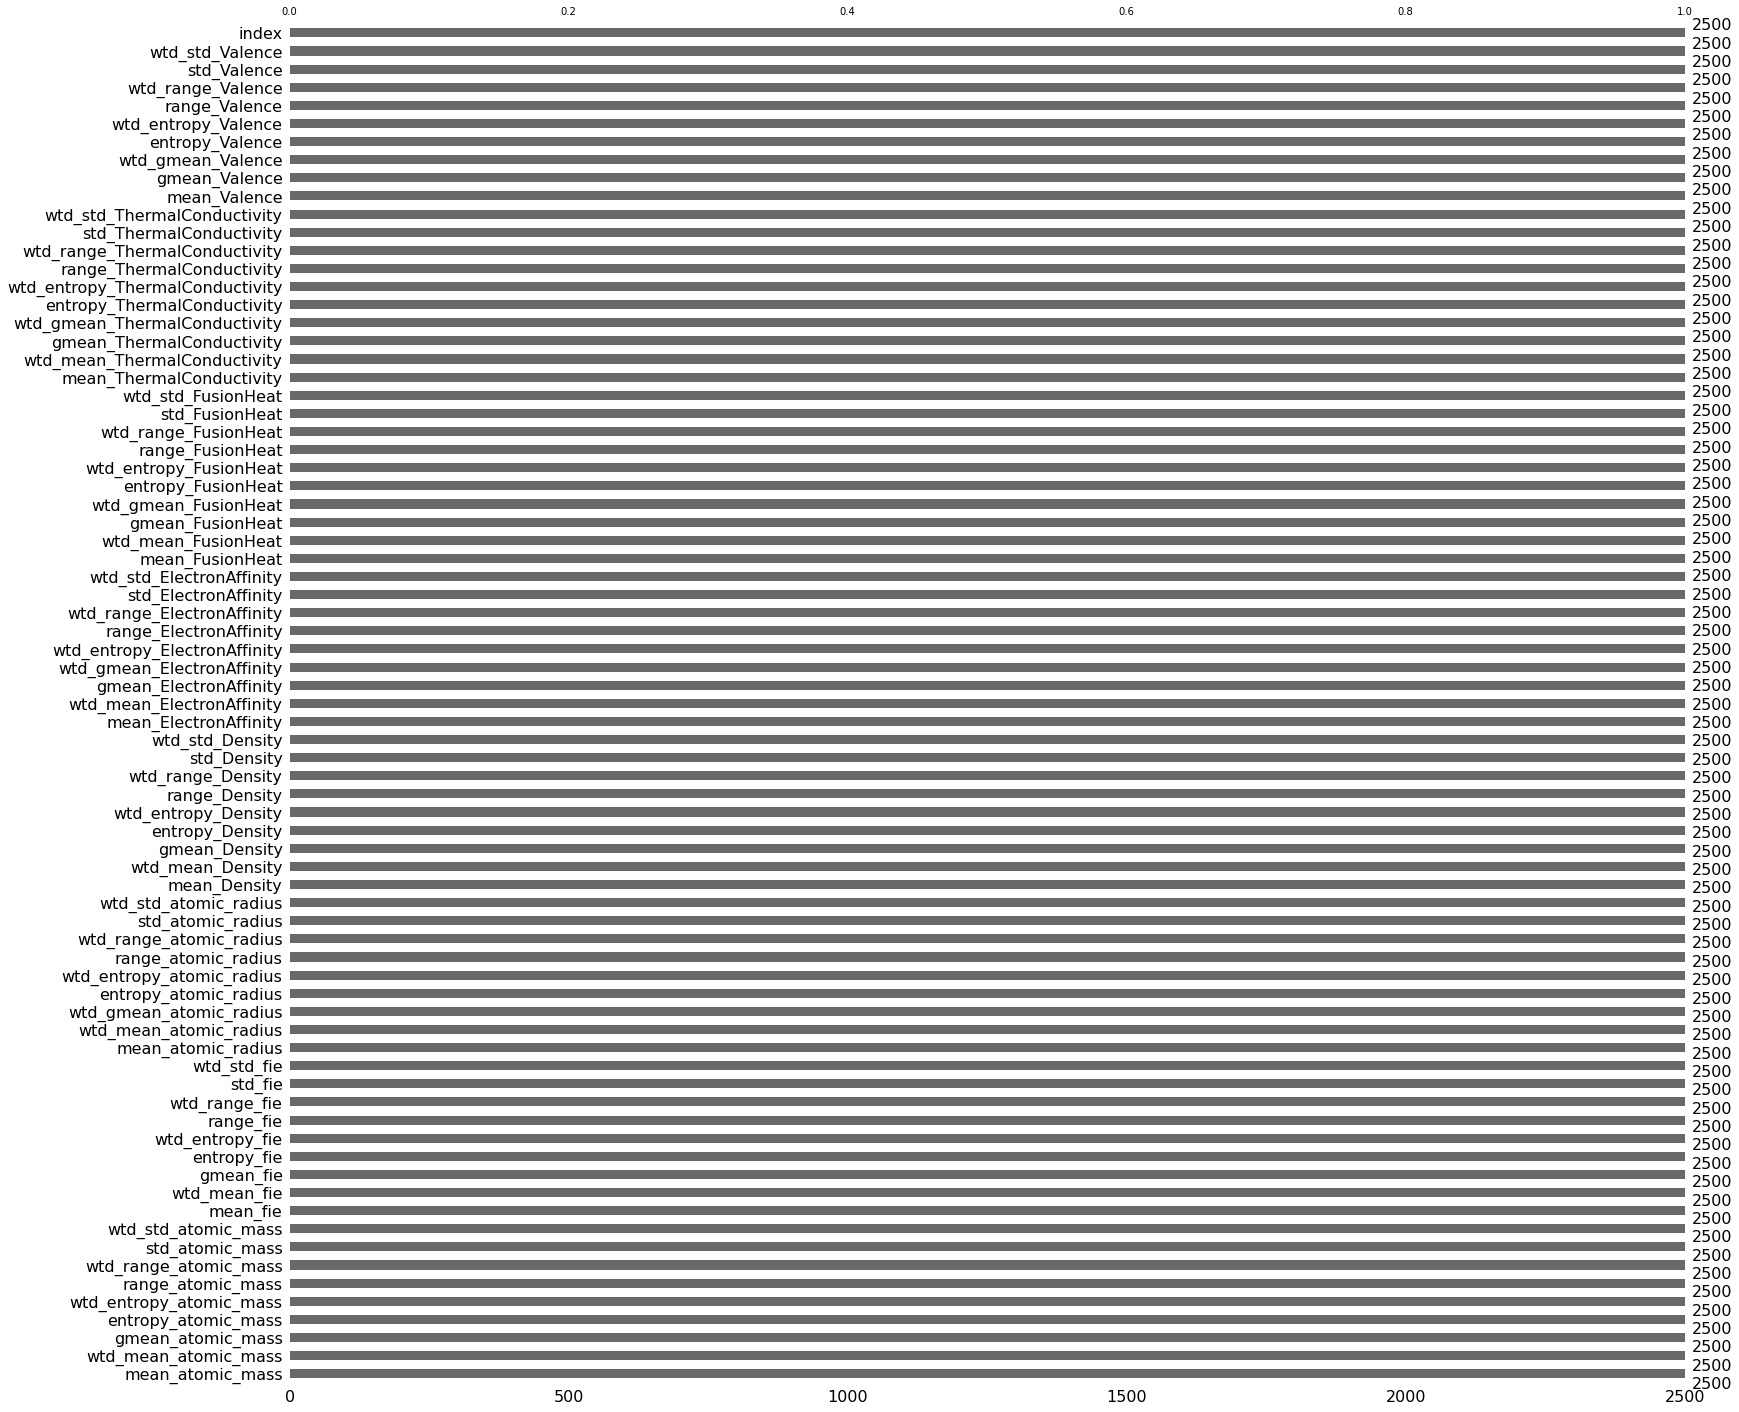

In [ ]:
# As null values are a small portion of the data, let's drop those columns
df_test.drop(['wtd_gmean_atomic_mass', 'wtd_gmean_fie', 'gmean_atomic_radius', 'wtd_gmean_Density',
         'entropy_ElectronAffinity','wtd_mean_Valence'], axis=1, inplace=True)
msno.bar(df_test); # Last check for null values!

Great! No more null values in the test set! Each feature can be represented as an array of (1,2500)

In [ ]:
# Last check: Let's calculate the percentage of null values in the test set
for i in df_test.columns:
    null_rate = df_test[i].isna().sum() / len(df_test) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))
    elif null_rate == 0 :
        print("{}'s null rate :{}%".format(i, 0))

mean_atomic_mass's null rate :0%
wtd_mean_atomic_mass's null rate :0%
gmean_atomic_mass's null rate :0%
entropy_atomic_mass's null rate :0%
wtd_entropy_atomic_mass's null rate :0%
range_atomic_mass's null rate :0%
wtd_range_atomic_mass's null rate :0%
std_atomic_mass's null rate :0%
wtd_std_atomic_mass's null rate :0%
mean_fie's null rate :0%
wtd_mean_fie's null rate :0%
gmean_fie's null rate :0%
entropy_fie's null rate :0%
wtd_entropy_fie's null rate :0%
range_fie's null rate :0%
wtd_range_fie's null rate :0%
std_fie's null rate :0%
wtd_std_fie's null rate :0%
mean_atomic_radius's null rate :0%
wtd_mean_atomic_radius's null rate :0%
wtd_gmean_atomic_radius's null rate :0%
entropy_atomic_radius's null rate :0%
wtd_entropy_atomic_radius's null rate :0%
range_atomic_radius's null rate :0%
wtd_range_atomic_radius's null rate :0%
std_atomic_radius's null rate :0%
wtd_std_atomic_radius's null rate :0%
mean_Density's null rate :0%
wtd_mean_Density's null rate :0%
gmean_Density's null rate :0

Great! Another confirmation that there is no more null values in the test set!

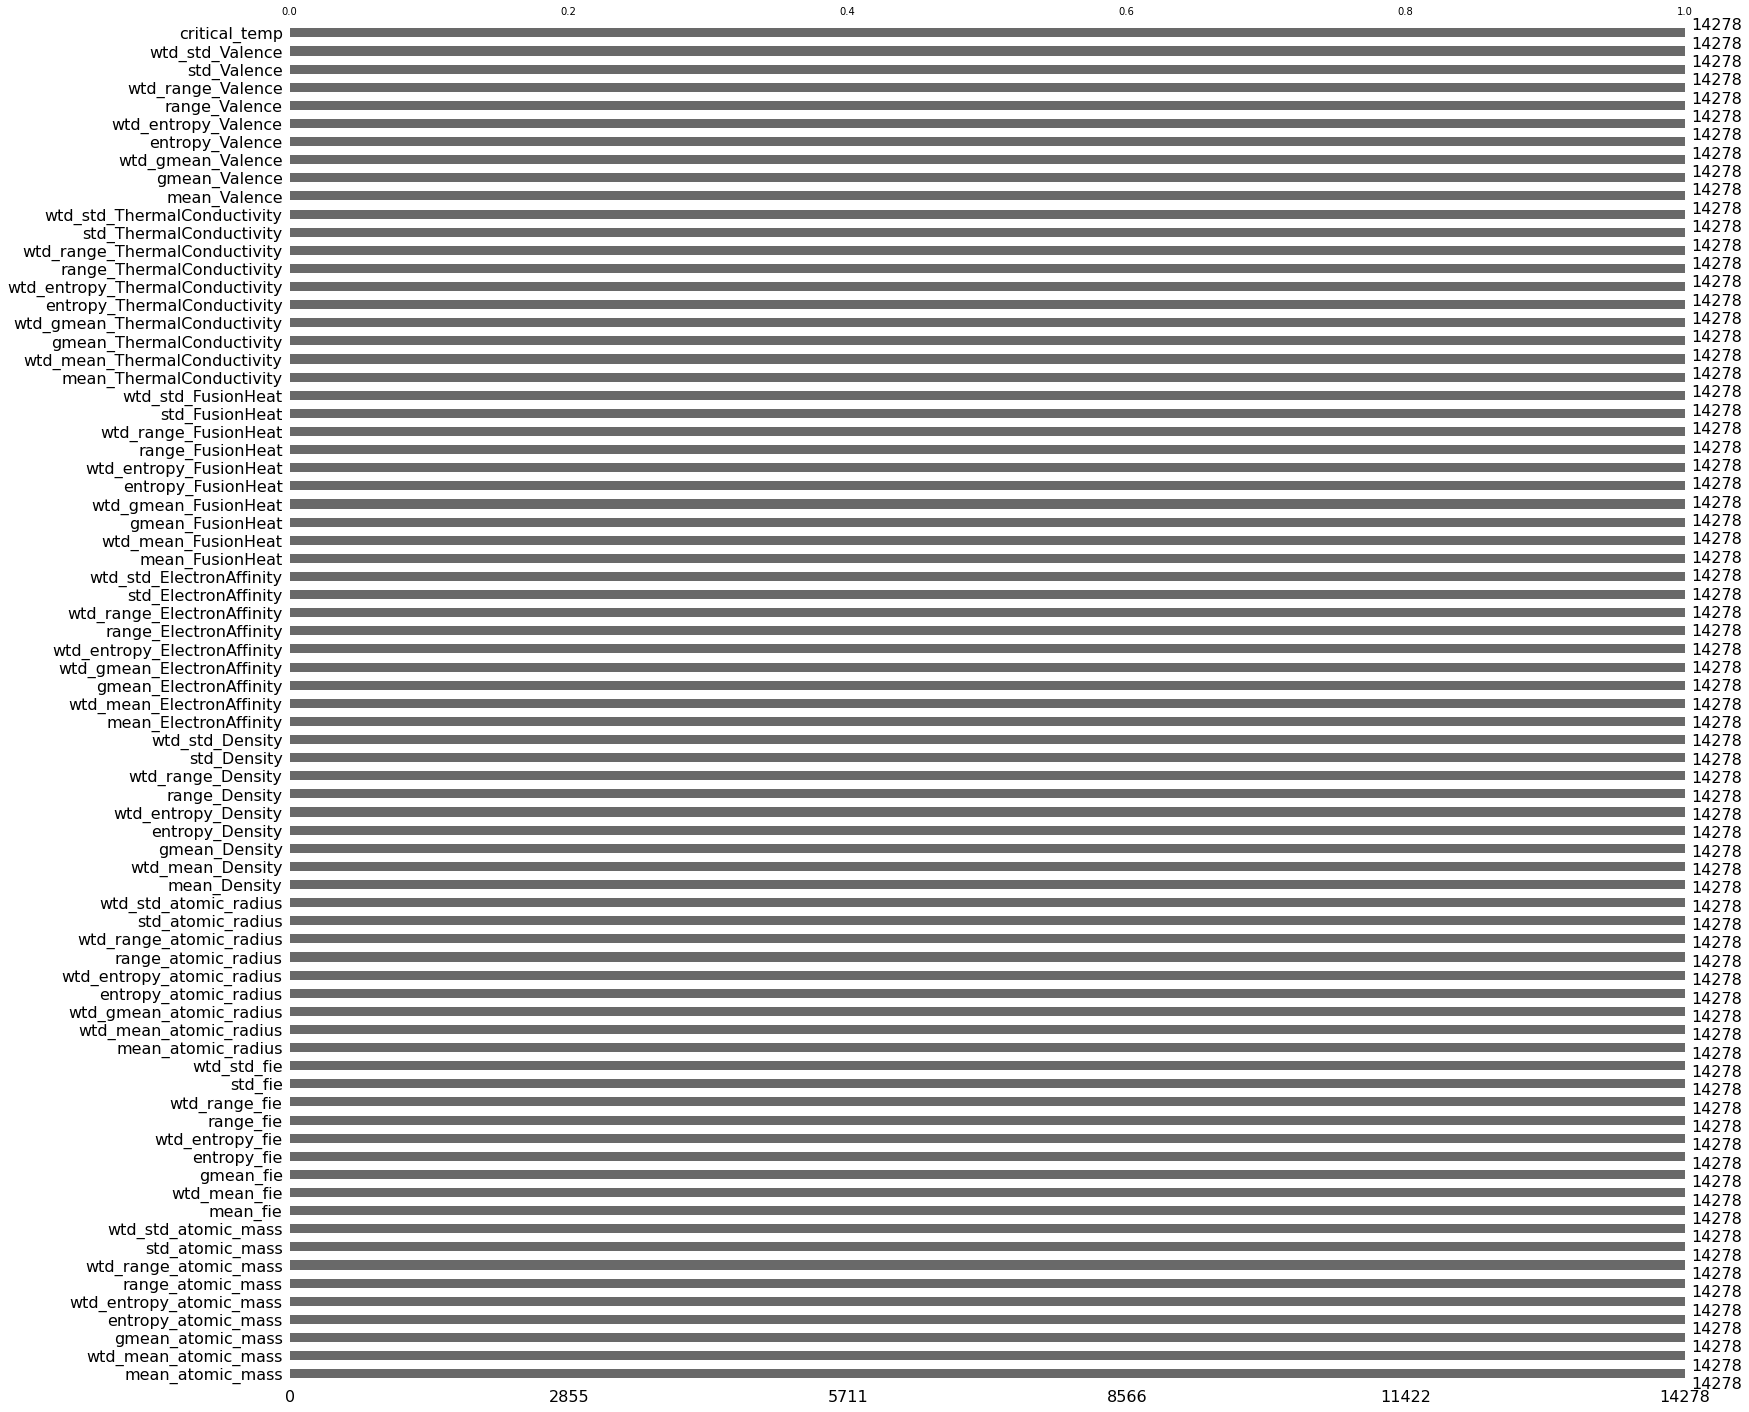

In [ ]:
# Let's drop the same columns from the training set!
df_train.drop(['wtd_gmean_atomic_mass', 'wtd_gmean_fie', 'gmean_atomic_radius', 'wtd_gmean_Density',
         'entropy_ElectronAffinity','wtd_mean_Valence'], axis=1, inplace=True)
msno.bar(df_train); # Last check for null values!

Great!

In [ ]:
X = df_train.iloc[:, :-1].values # Select all columns except the last one, which is "critical_temp"
y = df_train.loc[:, ["critical_temp"]].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[103.010254   114.09030968  76.29990788 ...   1.55166667   1.16619038
    1.40007043]
 [ 90.2786      55.66186923  66.98998734 ...   0.81538462   0.4330127
    0.3       ]
 [ 74.23165     51.26259462  60.51522055 ...   1.05846154   0.4
    0.26646936]
 ...
 [130.29862667 117.9898925  123.09353932 ...   3.72         0.47140452
    0.4330127 ]
 [ 91.50808     64.6698      64.5702746  ...   0.7826087    0.
    0.        ]
 [ 76.4445625   51.24566538  59.35667247 ...   0.84615385   0.4330127
    0.26646936]]


In [ ]:
print(y_train)

[[ 29.5]
 [ 69. ]
 [ 50.4]
 ...
 [  9.6]
 [105.1]
 [ 89. ]]


In [ ]:
print(X_test)

[[136.92713    177.42622    129.65805991 ...   4.6          0.
    0.        ]
 [ 76.4445625   49.71593667  59.35667247 ...   0.86666667   0.4330127
    0.24944383]
 [ 65.75360386  79.82336099  49.1001207  ...   0.84285714   0.63245553
    0.37498299]
 ...
 [ 83.24476     58.57162587  59.50608142 ...   0.94944189   1.2
    1.0132492 ]
 [ 88.612919    57.94001529  67.25730575 ...   1.02347418   0.8
    0.32617754]
 [110.7555478   95.6301822   58.63454256 ...   0.98360656   1.16619038
    1.25063811]]


In [ ]:
print(y_test)

[[ 4.47]
 [81.6 ]
 [88.4 ]
 ...
 [70.  ]
 [46.  ]
 [10.2 ]]


In [ ]:
# Last check for NaN elements in a NumPy Array in Python
def NaN_Check(array):
  array_sum = np.sum(array)
  array_has_nan = np.isnan(array_sum)
  return array_has_nan

print(NaN_Check(X_train))
print(NaN_Check(y_train))
print(NaN_Check(X_test))
print(NaN_Check(y_test))

False
False
False
False


Great! No NaN values. We are ready to go!

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50
import tensorflow.keras as tf
import cv2

In [ ]:
X_train_new = np.zeros((X_train.shape[0], 100))
X_train_new[:,:74] = X_train
X_train_new = X_train_new.reshape((X_train.shape[0], 10, 10))
X_train_new_resized = np.stack([cv2.resize(element, (128,128), cv2.INTER_NEAREST) for element in X_train_new])
X_train_new_res_renorm = np.stack([(element-np.min(element))/np.max(element-np.min(element)) for element in X_train_new_resized])
X_train_new_res_renorm = X_train_new_res_renorm[..., np.newaxis]
X_train_new_res_concat = np.concatenate([X_train_new_res_renorm, X_train_new_res_renorm, X_train_new_res_renorm], axis=-1)

In [ ]:
Premodel = ResNet152(include_top=False, input_shape=(128,128,3))
flat = tf.layers.Flatten()(Premodel.output)
dense = tf.layers.Dense(1024, activation='relu')(flat)
dense = tf.layers.Dense(1024, activation='relu')(dense)
dense = tf.layers.Dense(1)(dense)
model = tf.models.Model(inputs=Premodel.input, outputs=dense)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
model.compile(loss='MeanAbsoluteError', optimizer='Nadam')
callbe = tf.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)
model.fit(X_train_new_res_concat, y_train, validation_split = 0.1, callbacks=[callbe], epochs = 10)

Epoch 1/10
322/322 [==============================] - 153s 269ms/step - loss: 10.7621 - val_loss: 12.3349
Epoch 2/10
322/322 [==============================] - 83s 259ms/step - loss: 10.6189 - val_loss: 26.0969
Epoch 3/10
322/322 [==============================] - 83s 259ms/step - loss: 10.4087 - val_loss: 25.4663


In [ ]:
X_test = df_test.iloc[:, :-1].values
X_test_new = np.zeros((X_test.shape[0], 100))
X_test_new[:,:74] = X_test
X_test_new = X_test_new.reshape((X_test.shape[0], 10, 10))
X_test_new_resized = np.stack([cv2.resize(element, (128,128), cv2.INTER_NEAREST) for element in X_test_new])
X_test_new_res_renorm = np.stack([(element-np.min(element))/np.max(element-np.min(element)) for element in X_test_new_resized])
X_test_new_res_renorm = X_test_new_res_renorm[..., np.newaxis]
X_test_new_res_concat = np.concatenate([X_test_new_res_renorm, X_test_new_res_renorm, X_test_new_res_renorm], axis=-1)

In [ ]:
results = model.predict(X_test_new_res_concat)

In [ ]:
results.shape

(2500, 1)

In [ ]:
resultsf = np.concatenate((results.reshape(len(results),1), df_test.index.values.astype(int).reshape(len(df_test),1)),1)

In [ ]:
df_results = pd.DataFrame(data=resultsf, columns=["critical_temp","index"])
df_results["index"] = df_results["index"].astype(int)
df_results

,critical_temp,index
0,57.266502,0
1,66.310036,1
2,23.947750,2
3,67.853493,3
4,5.674156,4
...,...,...
2495,54.281147,2495
2496,66.257065,2496
2497,17.199421,2497
2498,54.863380,2498


In [ ]:
df_results.to_csv("submission.csv", index = False)